## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [26]:
import os, glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as tick
import seaborn as sns

In [27]:
os.listdir("zippedData/")
files = glob.glob("zippedData/*")
files

['zippedData\\bom.movie_gross.csv.gz',
 'zippedData\\imdb.name.basics.csv.gz',
 'zippedData\\imdb.title.akas.csv.gz',
 'zippedData\\imdb.title.basics.csv.gz',
 'zippedData\\imdb.title.crew.csv.gz',
 'zippedData\\imdb.title.principals.csv.gz',
 'zippedData\\imdb.title.ratings.csv.gz',
 'zippedData\\rt.movie_info.tsv.gz',
 'zippedData\\rt.reviews.tsv.gz',
 'zippedData\\tmdb.movies.csv.gz',
 'zippedData\\tn.movie_budgets.csv.gz']

### Studio, Gross & Year Dataset
- Items of Interest:
    - domestic_gross
    - foreign_gross (Chinese market?)
    - year (coorelate against other columns of interest)

In [28]:
df0 = pd.read_csv(files[0])
df0

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [29]:
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


### Release Dates, Budgets, Gross Dataset
- Points of Interest
    - release_date
    - movie
    - production_budget (money in)
    - domestic_gross vs worldwide_gross

In [30]:
df10 = pd.read_csv(files[10])
df10

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [31]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
id                   5782 non-null int64
release_date         5782 non-null object
movie                5782 non-null object
production_budget    5782 non-null object
domestic_gross       5782 non-null object
worldwide_gross      5782 non-null object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


### Thesis Questions

- Do successful movies trend more towards foreign or domestic markets? (Mean Domestic VS Mean Foreign)
    - domestic_gross
    - foreign_gross
    - Extra - Profit(Gross - Budget, Mean of Difference)

- production_budget against worldwide_gross (If I spend more money will it make more money)
    - production_budget
    - worldwide_gross
    
- Is there a studio that seems to attract a certain level of success?
    - Studios
    - Mean worldwide gross
    - Extra - Profit(Gross - Budget, Mean of Difference, list             against studio)
- Is there an amount spend in the budget that studios don't exceed OR Is there a direct relationship to amount spent in production Vs. How much is actually made?|

### Mean Domestic Vs. Mean Foreign
    - Foreign markets are lucative
    - Domestic is safe
    - Find something that both these groups would like to see

In [32]:
#Mean for Domestic
domestic_gross_mean = df0['domestic_gross'].mean()
print(domestic_gross_mean)

#Mean for Foreign
df0['foreign_gross'] = df0['foreign_gross'].astype('str')

df0['foreign_gross'] = df0['foreign_gross'].str.replace(',', '').astype(float)

foreign_gross_mean = df0['foreign_gross'].mean()
print(foreign_gross_mean)

#Domestic minus Foreign/Foreign minus Domestic
foreign_gross_mean - domestic_gross_mean

foreign_mean_percentage = 100 * foreign_gross_mean/(foreign_gross_mean + domestic_gross_mean)
domestic_mean_percentage = 100 * domestic_gross_mean/(foreign_gross_mean + domestic_gross_mean)
print(foreign_mean_percentage)
print(domestic_mean_percentage)

28745845.06698422
74872810.15046637
72.25804078748256
27.741959212517443


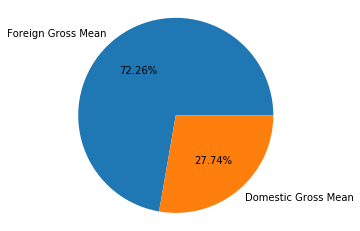

In [33]:
labels = 'Foreign Gross Mean', 'Domestic Gross Mean'
sizes = [foreign_mean_percentage, domestic_mean_percentage]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.2f%%')
ax1.axis('equal')
plt.show()

### Production Budget Vs. Worldwide Gross
    - Positive trend
    - If we spend more, we're likely to make more

In [34]:
#Sum of Production Expenditures
df10['production_budget'] = df10['production_budget'].astype('str')
df10['production_budget'] = df10['production_budget'].str.replace('$', '')
df10['production_budget'] = df10['production_budget'].str.replace(',', '').astype(float)

#Worldwide Gross
df10['worldwide_gross'] = df10['worldwide_gross'].astype('str')
df10['worldwide_gross'] = df10['worldwide_gross'].str.replace('$', '')
df10['worldwide_gross'] = df10['worldwide_gross'].str.replace(',', '').astype(float)


In [35]:
# Code Sourced from "https://dfrieds.com/data-visualizations/how-format-large-tick-values.html"
def reformat_large_tick_values(tick_val, pos):
    """
    Turns large tick values (in the billions, millions and thousands) such as 4500 into 4.5K and also appropriately turns 4000 into 4K (no zero after the decimal).
    """
    if tick_val >= 1000000000:
        val = round(tick_val/1000000000, 1)
        new_tick_format = '{:}B'.format(val)
    elif tick_val >= 1000000:
        val = round(tick_val/1000000, 1)
        new_tick_format = '{:}M'.format(val)
    elif tick_val >= 1000:
        val = round(tick_val/1000, 1)
        new_tick_format = '{:}K'.format(val)
    elif tick_val < 1000:
        new_tick_format = round(tick_val, 1)
    else:
        new_tick_format = tick_val

    # make new_tick_format into a string value
    new_tick_format = str(new_tick_format)
    
    # code below will keep 4.5M as is but change values such as 4.0M to 4M since that zero after the decimal isn't needed
    index_of_decimal = new_tick_format.find(".")
    
    if index_of_decimal != -1:
        value_after_decimal = new_tick_format[index_of_decimal+1]
        if value_after_decimal == "0":
            # remove the 0 after the decimal point since it's not needed
            new_tick_format = new_tick_format[0:index_of_decimal] + new_tick_format[index_of_decimal+2:]
            
    return new_tick_format


In [36]:
#Oldest to Newest
df10['release_date'] = df10['release_date'].astype('str')
pd.to_datetime(pd.Series(df10['release_date']))
df10.sort_values(by=['release_date'], inplace=True)

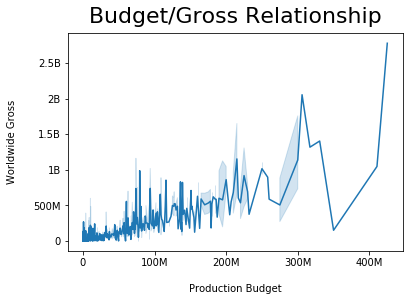

In [37]:
sns.lineplot(x = df10['production_budget'], y = df10['worldwide_gross'])
plt.xlabel("Production Budget", labelpad=16)
plt.ylabel("Worldwide Gross", labelpad=16)
plt.title("Budget/Gross Relationship", y=1.02, fontsize=22)
ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
plt.show()

### Movies by Release Date
    - What did we spend?
    - What did we make?

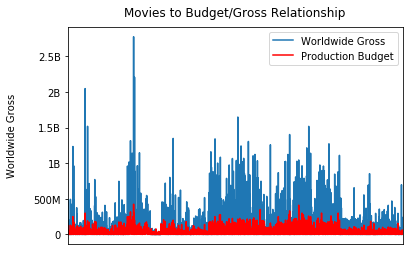

In [38]:
plt.xlabel("Movies", labelpad=16)
plt.ylabel("Worldwide Gross", labelpad=16)
plt.title("Movies & Budget/Gross Relationship", y=1.02, fontsize=22)

ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
df10.plot(kind='line',x='movie',y='worldwide_gross', ax=ax)
df10.plot(kind='line',x='movie', y='production_budget', color='red',ax=ax)
x_axis = ax.axes.get_xaxis()
x_axis.set_visible(False)
plt.title('Movies to Budget/Gross Relationship')
plt.legend(['Worldwide Gross', 'Production Budget'])
plt.show()


### Studios & Domestic & Foreign Gross
- Studios don't appear to spend more than 50-75% what they are expecting to make

In [39]:
studio = df0['studio']

domestic_gross = df0['domestic_gross']

foreign_gross = df0['foreign_gross']

df0['foreign_gross'] = df0['foreign_gross'].astype('str')
df0['foreign_gross'] = df0['foreign_gross'].str.replace(',', '').astype(float)

df0['year'] = df0['year'].astype('str')
pd.to_datetime(pd.Series(df0['year']))
df0.sort_values(by=['year'], inplace=True)

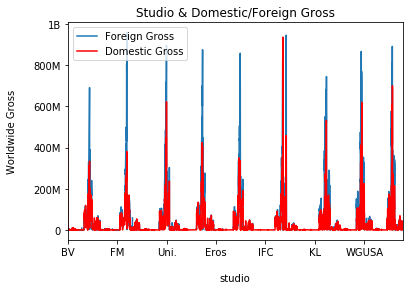

In [40]:
plt.xlabel("Studios", labelpad=16)
plt.ylabel("Worldwide Gross", labelpad=16)
plt.title("Studio & Domestic/Foreign Gross", y=1, fontsize=22)

ax = plt.gca()
ax.xaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
ax.yaxis.set_major_formatter(tick.FuncFormatter(reformat_large_tick_values));
df0.plot(kind='line',x='studio',y='foreign_gross', ax=ax)
df0.plot(kind='line',x='studio', y='domestic_gross', color='red',ax=ax)
plt.title('Studio & Domestic/Foreign Gross')
plt.legend(['Foreign Gross', 'Domestic Gross'])
plt.show()


### Conclusion
- There is growth in the foreign market
    - If we can appeal to all peoples and unifying things about our species, we can blow this out of the park
- We should build off the back of success that has worked for others studios
- Don't spend more than half of what you're expecting to make
    - You get what you put in
        - Can't expect to make a billion off of a shrimp budget
        - Be realistic with your profit goals, don't overextend production budgets.